# Algorithm 1. Sort

교제의 수도코드(pseudo-code)에서 사용하는 배열은 A[1,...,n]으로, 배열/리스트의 index가 1부터 시작된다.
그러나 컴퓨터 프로그래밍 언어에서 제공하는 배열/리스트와 같은 자료구조는 일반적으로 idex가 0부터 시작된다.
그러므로 교제의 수도코드를 구현할 때 이를 주의해서 구현해야 한다.

### 기본 알고리즘
* selectionSort (선택정렬)
* bubbleSort    (버블정렬)
* insertionSort (삽입정렬)

### 1. selectionSort (선택정렬)

선택 정렬에서 theLargest는 $last$개의 배열 요소 중에서 가장 큰 값을 찾아 해당 배열 요소의 오른쪽 끝 값과 교환한다.

즉 다음과 같이 구성되어 있는 크기 $5$인 배열 A를 가정하자.
$$A[3,2,6,5,1]$$
배열 A의 처음 요소 값부터 마지막 요소 값까지 비교하여 최대 값이 저장된 index를 찾는다.
배열 A에서 가장 큰 값($6$)과 오른쪽 끝 값($1$)을 교환하면 $A[3,2,1,5,6]$이 된다. 
이와 같은 작업을 수행하면 배열 A에서 가장 큰 값이 오른쪽 끝으로 이동하게 된다. 

그림 1-1은 배열 A의 가장 큰 원소를 찾는 절차를 나타낸다.
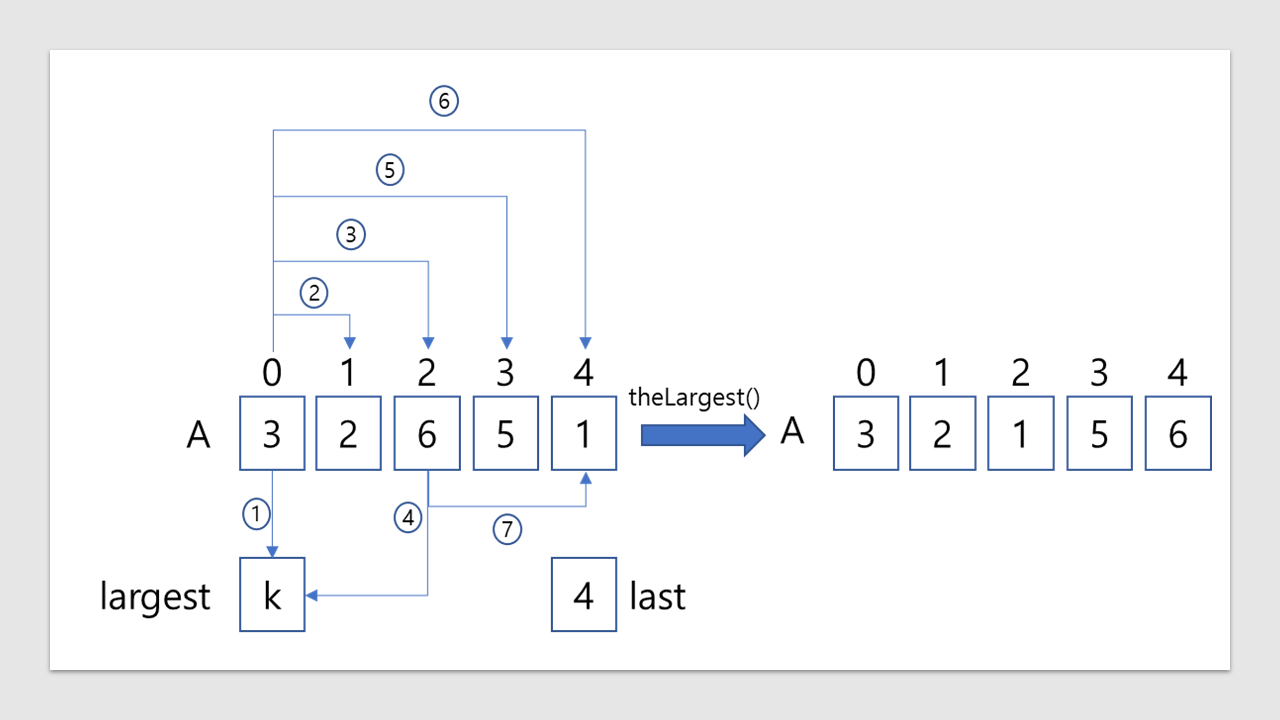
[그림 1-1. the Largest 수행 절차]


* step 1 : 초기화. A[0]를 A[0,...,last]에서 가장 큰 값이라 가정하고, largest에 A[0]의 index 0을 저장한다.
* step 2,3,5,6 : 요소의 값 비교. A[1,...,last]까지 A[largest]와 각각 값을 비교한다.
* step 4: 최대값 갱신. step 2,3,5,6을 수행하면서 A[largest]보다 큰 값을 가지는 배열의 요소가 발견되면, 해당 배열 요소의 index를 largest에 저장한다.
* step 7: A[largest]와 A[last] 값을 교환한다.


In [2]:
# -*- coding: utf-8 -*-
def theLargest(A, last):
    largest = 0;
    for i in range(1, last):
        if(A[i] >= A[largest]): #if(A[i] > A[largest]): 오류. why???
            largest = i;
    return largest

A=[3,2,6,6,5,1]
print(A)
largest = theLargest(A,A.__len__())
A[largest], A[A.__len__()-1] = A[A.__len__()-1], A[largest]
print(A)

[3, 2, 6, 6, 5, 1]
[3, 2, 6, 1, 5, 6]


이제 배열 $𝐴[3,2,1,5,6]$의 크기를 $4$로 간주하고 $A[3,2,1,5]$에서 가장 큰 값을 찾아 오른쪽 끝 값과 교환하면 $5$는 $5$와 교환된다. 이제 크기 $5$인 배열 A의 오른쪽 두 값은 가장 큰 값이 적절히 저장된다. 

다시 배열의 크기를 $3$으로 간주하고 $A[3,2,1]$에 대하여 동일한 작업을 수행한다. 

이러한 작업을 배열의 크기가 $1$이 될 때까지 수행한다. 배열 A는 다음과 같이 정렬된다.

(1) $A[3,2,1,5, 6]$

(2) $A[3,2,1,5]$ $[6]$

(3) $A[3,2,1]$ $[5,6]$

(4) $A[1,2]$ $[3,5,6]$

(5) $A[1]$ $[2,3,5,6]$

그림 1-2는 theLargest를 반복 호출하여 배열 A가 정렬되는 순서를 설명한다.

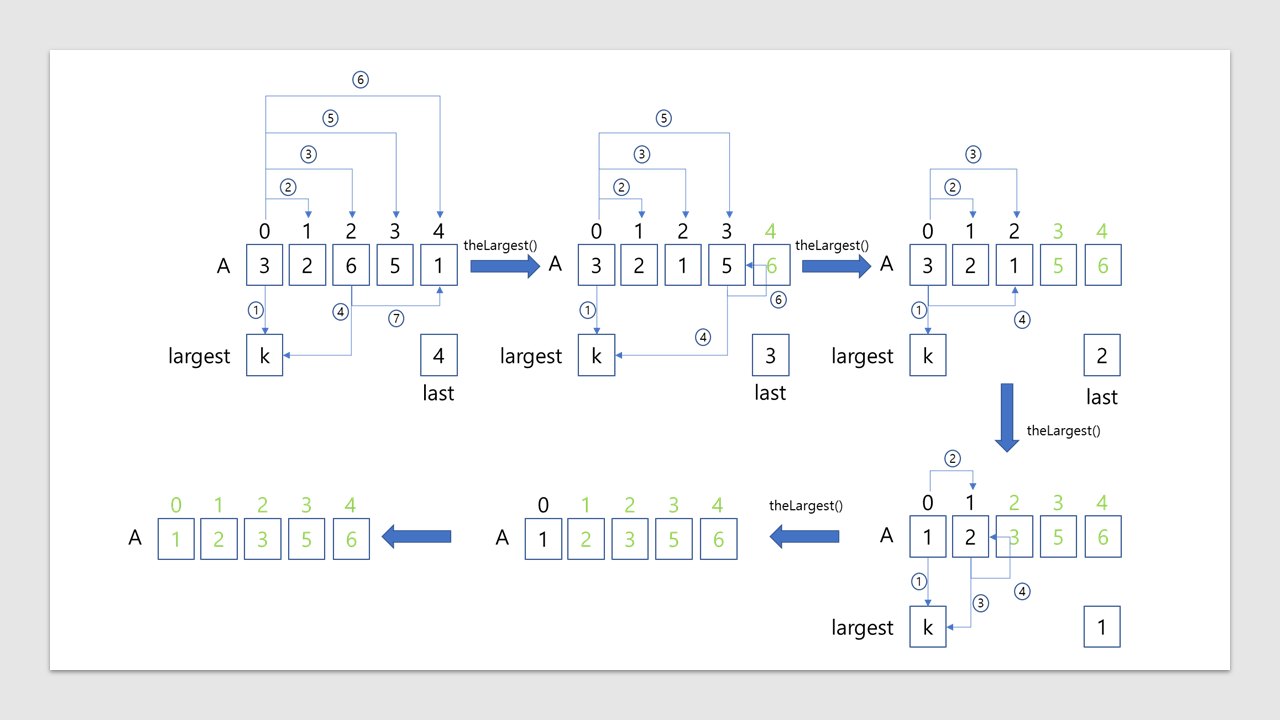
[그림 1-2. 선택 정렬]

theLargest는 크기가 $k$개인 배열에서 가장 큰 수를 찾기 위해서는 $k-1$번의 비교를 수행한다.

선택 정렬은 theLargest의 크기를 오른쪽 끝부터 1씩 줄이면서 배열의 크기가 1이 될때까지 theLargest를 호출한다.
즉, $n$개의 요소로 구성된 배열에 대하여 선택정렬을 수행하기 위해서는 $n-1$개의 부분 배열 $A[0,...,n-1]$, $A[0,...,n-2]$, $A[0,...,n-3]$, $...$, $A[0,1,2]$, $A[0,1]$을 입력 파라메터로 하여 theLargest를 각각 호출하고, 이 때 수행되는 대소비교의 총 회수는
$$ (n-1)+(n-2)+...+2+1= \frac{n(n-1)}{2}$$
가 된다.

그러므로 선택정렬의 수행시간은 $\theta(n^2)$이다.


In [2]:
# -*- coding: utf-8 -*-
#선택정렬
def theLargest(A, last):
    largest = 0;
    for i in range(1, last):
        if(A[i] >= A[largest]): #if(A[i] > A[largest]): 오류. why???
            largest = i;
    return largest 

def selectionSort(A, n):      
    for last in range(n-1, 0,-1):
        largest= theLargest(A, last)               
        A[largest], A[last] = A[last], A[largest]  
        
A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
selectionSort(A, lastIndex)
print(A)

[3, 2, 4, 9, 2, 7, 4, 4, 8]
[2, 2, 4, 3, 4, 4, 7, 9, 8]


### 2. bubbleSort    (버블정렬)

In [2]:
# -*- coding: utf-8 -*-
#버블정렬
def bubbleSort(A, n):
    for last in range(n-1, 0,-1): # 1<= last <= n-1
        for i in range(0, last):  # 0 <= i <= last-1
            if A[i] > A[i+1]: 
                A[i], A[i+1]=A[i+1], A[i] 
        
A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
bubbleSort(A, lastIndex)
print(A)

[3, 2, 4, 9, 2, 7, 4, 4, 8]
[2, 2, 3, 4, 4, 4, 7, 9, 8]


### 3. insertionSort (삽입정렬)

In [3]:
# -*- coding: utf-8 -*-
#삽입정렬
def insertionSort(A,n):
    for i in range(1, n):
        loc     = i-1
        newItem = A[i]
        while loc >= 0 and newItem < A[loc]:
            A[loc+1]=A[loc]
            loc-=1
        A[loc+1]=newItem
        
A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
insertionSort(A, lastIndex)
print(A)

[3, 2, 4, 9, 2, 7, 4, 4, 8]
[2, 2, 3, 4, 4, 4, 7, 9, 8]


### 고급정렬알고리즘
* mergeSort    (병합정렬)
* quickSort     (퀵정렬)
* heapSort       (힙정렬)

### 4. mergeSort    (병합정렬)

In [4]:
# -*- coding: utf-8 -*-
#병합정렬
def merge(A,p,q,r):
    i, j, t = p, q+1, 1
    temp=[]
    while i <= q and j <= r:
        if A[i] <= A[j] :
            temp.append(A[i])
            i+=1
        else:
            temp.append(A[j])
            j+=1
    while i <= q:
        temp.append(A[i])
        i+=1
    while j <= r:
        temp.append(A[j])
        j+=1
    i=p 
    t=0
    while i <= r:
        A[i]=temp[t] 
        i+=1
        t+=1

def mergeSort(A, p, r):
    if p < r :        
        q = int((p+r)/2)
        mergeSort(A, p, q)
        mergeSort(A, q+1,r)
        merge(A,p,q,r)
        
A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
insertionSort(A, lastIndex)
print(A)

[3, 2, 4, 9, 2, 7, 4, 4, 8]
[2, 2, 3, 4, 4, 4, 7, 9, 8]


### 5. quickSort     (퀵정렬)

In [5]:
# -*- coding: utf-8 -*-
#퀵정렬
def partition(A,p,r):
    x = A[r]
    i = p-1
    for j in range(p, r):  # p <= j <= r-1
        print(j, r)
        if A[j] <= x: 
            i+=1
            A[i], A[j] = A[j], A[i] 
    i+=1
    A[i], A[r] = A[r], A[i] 
    return i
def quickSort(A,p,r):
    if p < r:
        q = partition(A, p, r)
        #print("q is %d"%q, A)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)
        
A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
insertionSort(A, lastIndex)
print(A)

[3, 2, 4, 9, 2, 7, 4, 4, 8]
[2, 2, 3, 4, 4, 4, 7, 9, 8]


### 6. heapSort       (힙정렬)

In [6]:
# -*- coding: utf-8 -*-
#힙정렬
def heapify(A, k, n): #To make a heap for a subtree which its subroot is A[k]
    leftChild   = 2*k 
    rightChild  = 2*k+1
    if rightChild <= n:
        if A[leftChild] < A[rightChild]:
            smaller = leftChild 
        else:
            smaller = rightChild 
    elif leftChild <= n:
        smaller = leftChild 
    else:
        return
    if A[smaller] < A[k]:
        A[k], A[smaller] = A[smaller], A[k]
        heapify(A, smaller, n)

def buildHeap(A, n):
    last = int(n/2)
    for i in range(last, -1, -1):  # n/2 >= i > 0
        heapify(A, i, n)
#        print("i is %d"%i, A)
        
def heapSort(A, n):
    buildHeap(A, n)
    for i in range(n, 0, -1):
        A[0], A[i] = A[i], A[0]
        heapify(A, 0, i-1)        
#        print(A)

A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
insertionSort(A, lastIndex)
print(A)

[3, 2, 4, 9, 2, 7, 4, 4, 8]
[2, 2, 3, 4, 4, 4, 7, 9, 8]


### 특수정렬
* radixSort (기수정렬)
* countingSort (계수정렬)

### 7. radixSort (기수정렬)

In [7]:
# -*- coding: utf-8 -*-
#기수정렬
#16진수를 base로 하는 기수정렬

from math import log
def radixSort_base16(A,n):
    base=16 #16진수 기준    
    
    digit = int(log(max(A), base) + 1)
    #print(digit)
    mask=0xF
    rightSift=0;    
       
    for x in range(0,digit):
        list = []
        for y in range(0, base-1):
            list.append([])        
        #for y in range(0, base-1):
        #    print(list[y])
        for i in range(0, n+1):
            y = A[i] & mask
        #    print("%d digit,i is %d"%(x,i), hex(A[i]),A[i], "is appended in list[%d]"%y)            
            y = y >> rightSift
            list[y].append(A[i])
        #   for y in range(0, base-1):
        #        print(y, list[y])        
        i=0
        for y in range(0, base-1):
            for k in range(0, list[y].__len__() ):                
                A[i]=list[y][k]
                i+=1
        rightSift +=4
        mask = mask << 4 

A=[3,2,4,9,2,7,4,4,8]
A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
#A=[3,4,2,39,29,33,31, 22, 11, 16]
#B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
radixSort_base16(A, lastIndex)
print(A)

[291, 8532, 546, 4, 643, 5472, 4193, 8528, 55]
[4, 55, 291, 546, 643, 4193, 5472, 8528, 8532]


### 8. countingSort (계수정렬)

In [8]:
# -*- coding: utf-8 -*-
#계수 정렬
#16진수를 base로 하는 기수정렬

def countSort(A, B, n):    
    
    for i in range(0, A.__len__()):
        B.append(0)
    
    k=max(A)
    C=[]
    for i in range(0, k+1):
        C.append(0)    
    
    for i in range(0, n+1):
        C[ A[i] ] +=1
        
    for i in range(1, k+1):
        C[i] += C[i-1]
            
    for i in range(0, n+1):        
        B[ C[ A[i]]-1 ] =A[i]  # C[ A[i]]-1  : index가 0부터 시작하므로
        C[ A[i]] -=1
        
#A=[3,2,4,9,2,7,4,4,8]
#A=[0x123,0x2154,0x222,0x4,0x283,0x1560,0x1061,0x2150,0x37]
A=[3,4,2,39,29,33,31, 22, 11, 16]
B=[]
n=A.__len__()    
firstIndex=0
lastIndex=n-1
print(A)
countSort(A, B, lastIndex)
print(B)

[3, 4, 2, 39, 29, 33, 31, 22, 11, 16]
[2, 3, 4, 11, 16, 22, 29, 31, 33, 39]
